## Timeseries Example

This example demonstrates how to extract a time series for a single point, and visualise it as  an interactive meterogram.

In [ ]:
import earthkit.data

LOCATION = [[-9.11, 38.79]]

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,  # Note: date must be within the last two days 
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0001", 
    "domain" : "g",
    "param" : "164/167/169",
    "number" : "1/to/50",
    "feature" : {
        "type" : "timeseries",
        "points": LOCATION,
        "time_axis": "step",
        "range" : {
            "start" : 0,
            "end" : 360,
        },
        "axes" : ["latitude", "longitude"]
    },
}

ds = earthkit.data.from_source(
    "polytope",
    "ecmwf-mars",
    request,
    stream=False,
    address='polytope.ecmwf.int',
)

## Visualise 

The following visualisation uses [earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/).

<div style="padding: 20px; background-color: #ffdddd; border-left: 6px solid #f44336; margin-bottom: 15px; width: 95%;">
    <strong>Note</strong>: This notebook is rendered in many different ways depending on where you are viewing it (e.g. GitHub, Jupyter, readthedocs etc.). To maximise compatibility with many possible rendering methods, all interactive plots are rendered with <code>chart.show(renderer="png")</code>, which removes all interactivity and only shows a PNG image render.<br><br>
    If you are running this notebook in an interactive session yourself and would like to interact with the plots, remove the <code>renderer="png"</code> argument from each call to <code>chart.show()</code>.
</div>

In [4]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location[0]
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

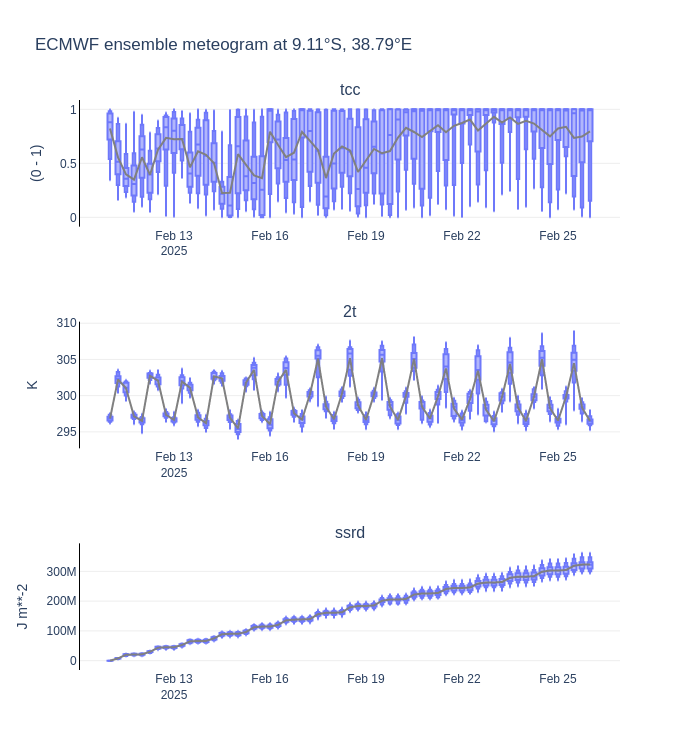

In [5]:
from earthkit.plots.interactive import Chart

TIME_FREQUENCY = "6h"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds,aggregation='mean', line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show(renderer="png")  # Replace with chart.show() in an interactive session!

## Convert to Xarray

In [7]:
da = ds.to_xarray()
print(da)

<xarray.Dataset> Size: 176kB
Dimensions:   (x: 1, y: 1, z: 1, number: 50, datetime: 1, t: 145)
Coordinates:
  * x         (x) float64 8B -9.104
  * y         (y) float64 8B 38.81
  * z         (z) int64 8B 0
  * number    (number) int64 400B 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * datetime  (datetime) <U20 80B '2025-02-11T00:00:00Z'
  * t         (t) datetime64[ns] 1kB 2025-02-11 ... 2025-02-26
Data variables:
    tcc       (x, y, z, number, datetime, t) float64 58kB 1.0 0.7982 ... 1.0 1.0
    2t        (x, y, z, number, datetime, t) float64 58kB 296.5 296.4 ... 296.3
    ssrd      (x, y, z, number, datetime, t) float64 58kB 0.0 0.0 ... 3.031e+08
Attributes:
    class:          od
    Forecast date:  2025-02-11T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    stream:         enfo
    type:           pf
